In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")
df = pd.read_csv('data/walmart_transactions.csv')
# df.to_csv('data/walmart_transactions.csv', index=False)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Understanding the data

In [57]:
# For ease of analysis coverting categorical variables of ease of analysis
df['Occupation'] = df['Occupation'].astype(str)
df['Marital_Status'] = df['Marital_Status'].astype(str)
df['Product_Category'] = df['Product_Category'].astype(str)
# df['Occupation'] = df['Occupation'].astype(str)

In [58]:
#checking datatypes
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [59]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [60]:
#checking null values in every column of our data
df.isnull().sum()/len(df)*100


User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

## Given

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday.

Black friday is a time when sales tend to go up as heavy discounts and possible bank offers are there for the taking which leads to a lot of Bulk buying

- There are roughly 3k+ Product sales data across 20 product categories transactions data available with us.
- There are 4 key demographic variables captured in terms of caegories majorly: Age, Occupation, Marital Status, City Category, Stay in City years & Gender around which our analysis should help them understand there Target Customers.

- The overall data is predominantly categorical in nature whereas our target variable i.e. Purchase AKA Sales is continuous in nature.

- There are no null values in the dataset

In [61]:
df.shape

(550068, 10)

In [62]:
#checking the occurences of each of the Occupation
df['Occupation'].value_counts(1)

# Occupation category: 4, 0 & 7 have roughly 1/3rd of transactions

4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: Occupation, dtype: float64

In [63]:
#checking the occurences of each of the Age
df['Age'].value_counts(1)

# Age cohorts between 18-45 are major buyers in terms of transactions

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

In [64]:
#checking the occurences of each of the Gender
df['Gender'].value_counts(1)

# Males tend to transact more than Women

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [65]:
#checking the occurences of each of the Marital_Status
df['Marital_Status'].value_counts(1)

# Unmarried people tend to transact more than 

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

In [66]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [67]:
#checking the occurences of each of the Stay_In_Current_City_Years Category
df['Stay_In_Current_City_Years'].value_counts(1)

# People who have stayed in a city for 1 or 2 years tend to transact more from walmart

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64

In [68]:
#checking the occurences of each of the City Category
df['City_Category'].value_counts(1)

# City Category B tends to drive more volume of transactions

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

In [69]:
#checking the occurences of each of the City Category
df['Product_Category'].value_counts(1)

# Product Category 1, 5 & 8 tends to drive more volume of transactions

5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: Product_Category, dtype: float64

In [70]:
threshold = np.median(df['User_ID'].value_counts().values)
threshold

54.0

In [71]:
# Statistically dividing the customers into two equal parts basis the volume transactions

df['Volume_Buyers'] = df['User_ID'].map((df['User_ID'].value_counts()>threshold).to_dict())

<AxesSubplot: xlabel='User_ID', ylabel='Count'>

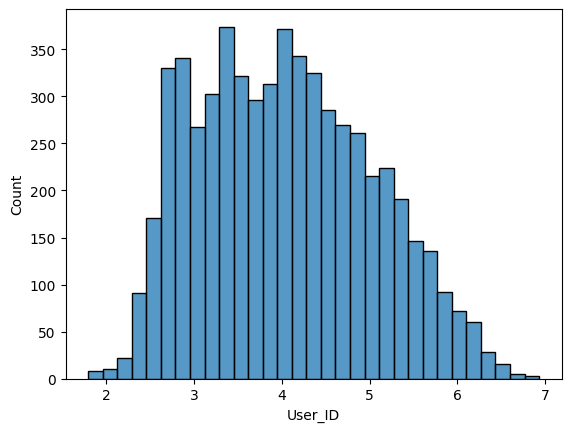

In [72]:
sns.histplot(np.log(df['User_ID'].value_counts()))

In [73]:
for i in df.drop(columns=['Product_ID']).columns:
    print(i, " - ", df[i].dtypes, ", unique value count- ", df[i].nunique(), ", unique values - ", ", ".join(map(str, df[i].unique())) if df[i].dtypes not in (int, float) else 'float/int', ", null values - ", df[i].isnull().sum())


User_ID  -  int64 , unique value count-  5891 , unique values -  float/int , null values -  0
Gender  -  object , unique value count-  2 , unique values -  F, M , null values -  0
Age  -  object , unique value count-  7 , unique values -  0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25 , null values -  0
Occupation  -  object , unique value count-  21 , unique values -  10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11, 8, 19, 2, 18, 5, 14, 13, 6 , null values -  0
City_Category  -  object , unique value count-  3 , unique values -  A, C, B , null values -  0
Stay_In_Current_City_Years  -  object , unique value count-  5 , unique values -  2, 4+, 3, 1, 0 , null values -  0
Marital_Status  -  object , unique value count-  2 , unique values -  0, 1 , null values -  0
Product_Category  -  object , unique value count-  20 , unique values -  3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 16, 18, 10, 17, 9, 20, 19 , null values -  0
Purchase  -  int64 , unique value count-  18105 , unique values -  flo

In [74]:
df.describe(include='object')

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


In [75]:
df.describe().loc[["mean", "50%"], :]

,User_ID,Purchase
mean,1.003029e+06,9263.968713
50%,1.003077e+06,8047.000000


In [76]:
num_cols = list(df.describe().columns)

# Since, User_ID is not categorical in nature
num_cols.remove('User_ID')
# num_cols.remove('Fitness')

In [77]:
num_cols

['Purchase']

In [78]:
# range of data across numerical data points

range_df = df[num_cols].describe().loc[["min", "max"]].T.apply(lambda x: str(int(x['min'])) +"-"+ str(int(x['max'])), axis=1).reset_index()

range_df = range_df.rename(columns={0: "Range", 'index': "cols"}).set_index('cols')

range_df

,Range
cols,
Purchase,12-23961


#### **Result**:


- **Occupation category: 4, 0 & 7** have roughly 1/3rd of transactions
- **Age cohorts** between **18-45** are major buyers in terms of transactions
- **Unmarried people** tend to transact more than 
- **Males** tend to transact more than Women
- People who have stayed in a city for **1 or 2 years** tend to transact more from walmart
- **City Category B** tends to drive more volume of transactions
- **Product Category 1, 5 & 8** tends to drive more volume of transactions

In [79]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase', 'Volume_Buyers'],
      dtype='object')

### Outlier Detection in continuous variables



Purchase
mean    9263.968713
50%     8047.000000
Name: Purchase, dtype: float64
The column: Purchase has outliers towards the right


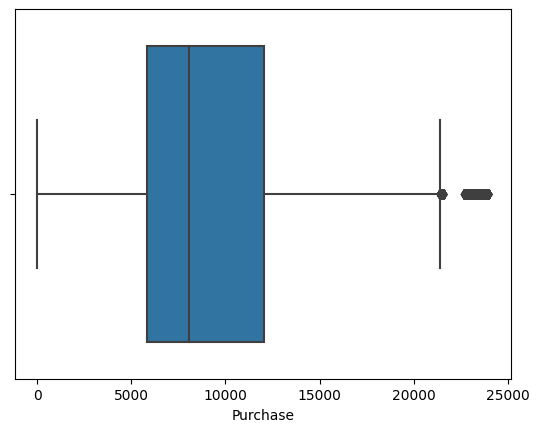

In [80]:
# Outlier Detection in continuous variables

for i in num_cols:

    print("\n")
    print(i)

    print(df.describe().loc[["mean", "50%"], i])
    if df.describe().loc["mean", i] < df.describe().loc["50%", i]:
        # If mean is lesser than median then outliers are towards the left
        print(f"The column: {i} has outliers towards the left")
    elif df.describe().loc["mean", i] > df.describe().loc["50%", i]:
        # If mean is more than median then outliers are towards the right
        print(f"The column: {i} has outliers towards the right")
    else:
        print(f"The column: {i} doesn't have any outliers")

    sns.boxplot(x=df[i])
    plt.show()



In [81]:
df['Product_Category'].unique()

array(['3', '1', '12', '8', '5', '4', '2', '6', '14', '11', '13', '15',
       '7', '16', '18', '10', '17', '9', '20', '19'], dtype=object)

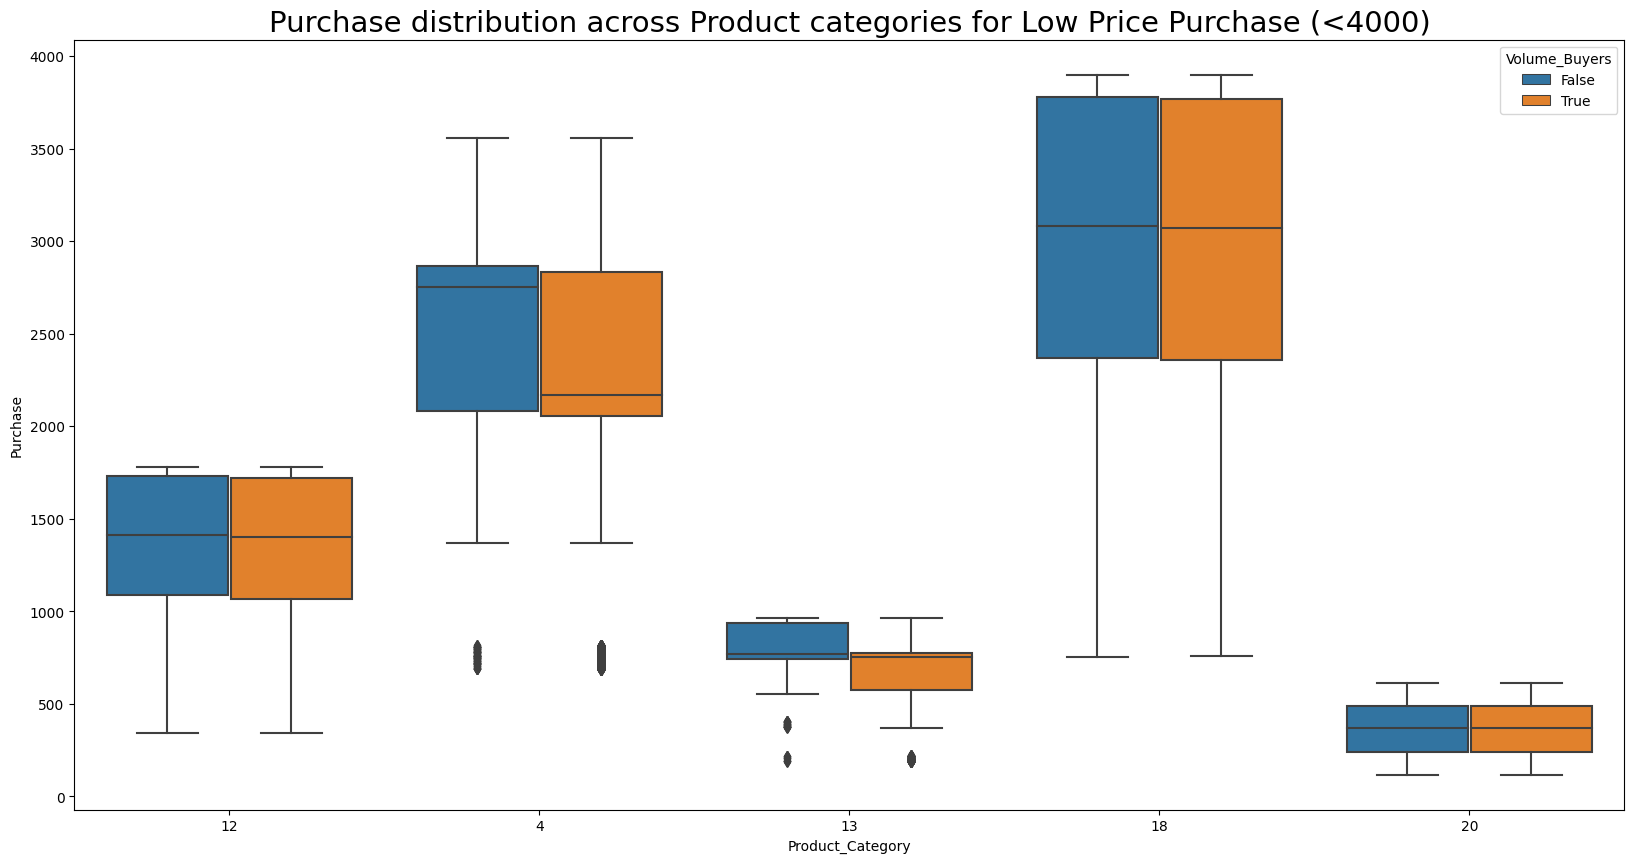

In [82]:
low_prod_categories = ['12', '4', '13', '18', '20']
data = df.loc[df['Product_Category'].isin(low_prod_categories), :]
plt.figure(figsize=(20, 10))
sns.boxplot(y=data[i], x=data['Product_Category'], hue=data['Volume_Buyers'])
plt.title("Purchase distribution across Product categories for Low Price Purchase (<4000)", fontsize=21)
plt.show()

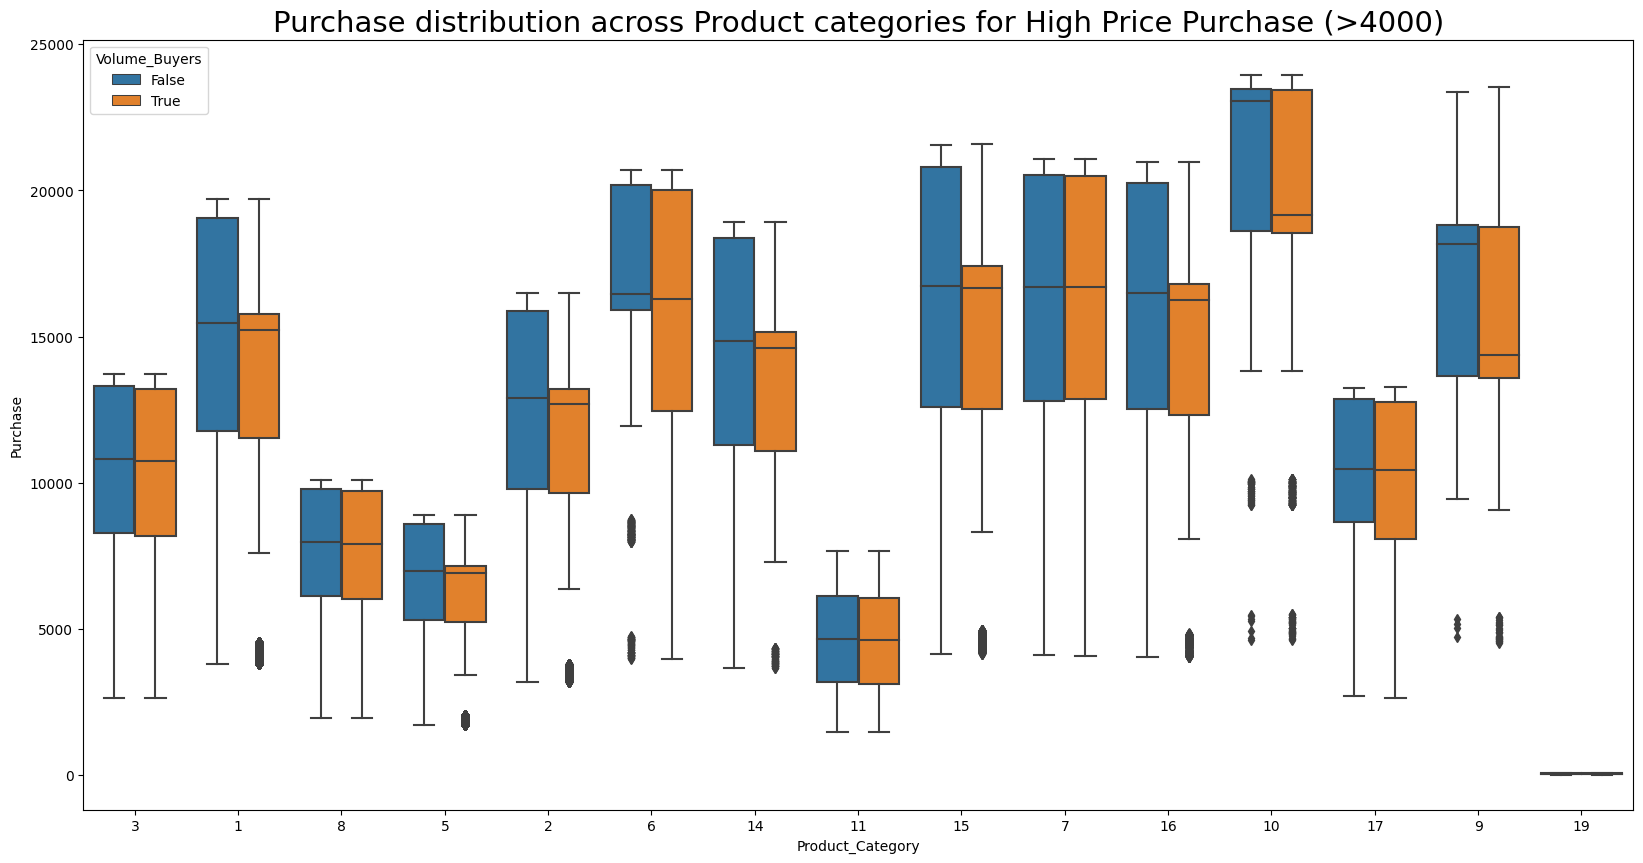

In [83]:
data = df.loc[~df['Product_Category'].isin(low_prod_categories), :]
plt.figure(figsize=(20, 10))
sns.boxplot(y=data[i], x=data['Product_Category'], hue=data['Volume_Buyers'])
plt.title("Purchase distribution across Product categories for High Price Purchase (>4000)", fontsize=21)
plt.show()

In [84]:
df['Volume_Buyers'].unique()

array([False,  True])

In [85]:
def diff_func(cats='Product_Category', aggfunc='median'):
    diff_df = pd.pivot_table(data=df, index=cats, columns='Volume_Buyers', values='Purchase', aggfunc=aggfunc)


    diff_df['diff_pct'] = ((diff_df[False]-diff_df[True])*100/((diff_df[True]+diff_df[False])/2))

    return diff_df.loc[diff_df['diff_pct']>diff_df['diff_pct'].mean()]


In [86]:
diff_func(cats='Product_Category', aggfunc='median')

Volume_Buyers,False,True,diff_pct
Product_Category,,,
10,23045.0,19158.0,18.420491
4,2755.0,2169.0,23.801787
9,18156.0,14351.0,23.410342


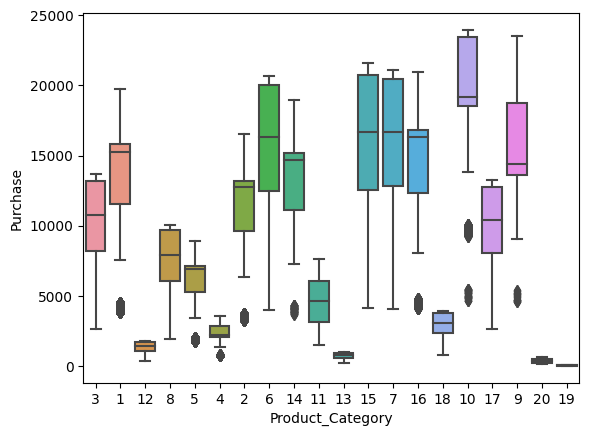

In [87]:
sns.boxplot(data=df, x='Product_Category', y = 'Purchase')
plt.show()

# There seem to be significant difference in terms of purchase behaviour across product categories
# Certain product categories have extremely low purchase value i.e. 

In [88]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase', 'Volume_Buyers'],
      dtype='object')

In [89]:
diff_func(cats='Gender', aggfunc='mean')

Volume_Buyers,False,True,diff_pct
Gender,,,
M,9974.398893,9352.636491,6.434121


In [90]:
diff_func(cats='Stay_In_Current_City_Years', aggfunc='median')

Volume_Buyers,False,True,diff_pct
Stay_In_Current_City_Years,,,
1,8607,8011,7.172945
3,8671,8008,7.950117


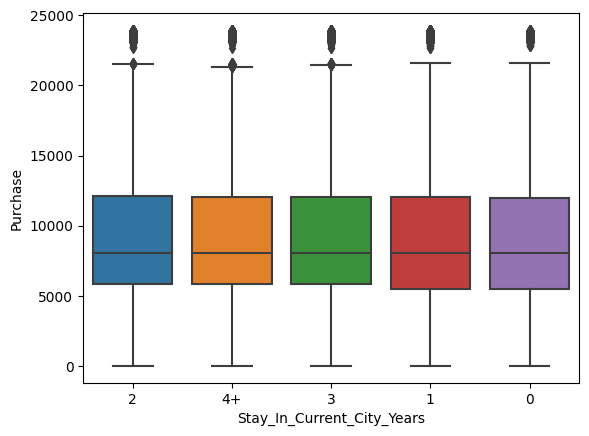

In [91]:
sns.boxplot(data=df, x='Stay_In_Current_City_Years', y = 'Purchase')
plt.show()

# There doesn't seem to be too much difference in terms of purchase behaviour across Stay years

In [92]:
diff_func(cats='Gender', aggfunc='median')

Volume_Buyers,False,True,diff_pct
Gender,,,
M,8698.0,8066.0,7.539967


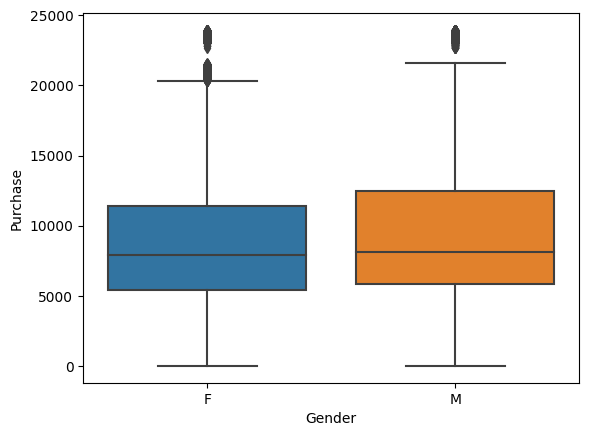

In [93]:
sns.boxplot(data=df, x='Gender', y = 'Purchase')
plt.show()

# There doesn't seem to be too much difference in terms of purchase behaviour across genders

In [94]:
diff_func(cats='Age', aggfunc='median')

Volume_Buyers,False,True,diff_pct
Age,,,
18-25,8608,7992,7.421687
26-35,8638,8000,7.669191
36-45,8668,8027,7.678946
46-50,8638,7995,7.731618


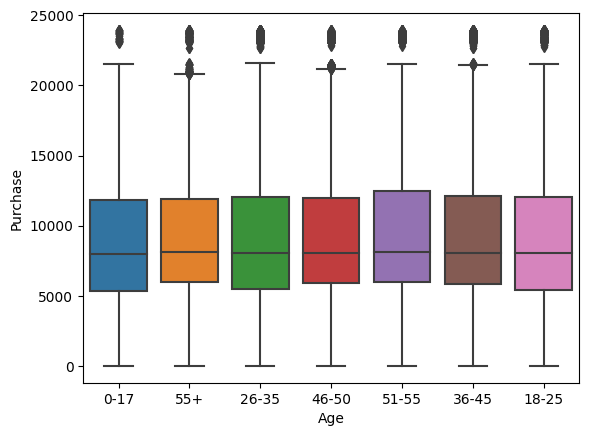

In [95]:
sns.boxplot(data=df, x='Age', y = 'Purchase')
plt.show()

# There doesn't seem to be too much difference in terms of purchase behaviour across Age

In [96]:
diff_func(cats='Marital_Status', aggfunc='median')

Volume_Buyers,False,True,diff_pct
Marital_Status,,,
0,8610,8014,7.170356


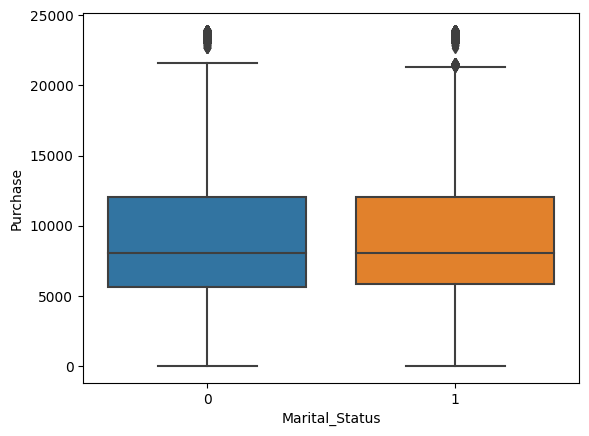

In [97]:
sns.boxplot(data=df, x='Marital_Status', y = 'Purchase')
plt.show()

# There doesn't seem to be too much difference in terms of purchase behaviour across Married and unmarried people

In [98]:
diff_func(cats='Occupation', aggfunc='median')

Volume_Buyers,False,True,diff_pct
Occupation,,,
0,8575.0,7970.0,7.313388
11,8668.5,7983.0,8.233492
12,8789.0,8270.0,6.084765
14,8701.0,8087.0,7.314749
18,8691.0,7926.0,9.207438
19,8797.0,7783.0,12.231604
2,8620.0,7910.0,8.590442
3,8596.0,7980.0,7.432432
4,8612.0,8014.0,7.193552


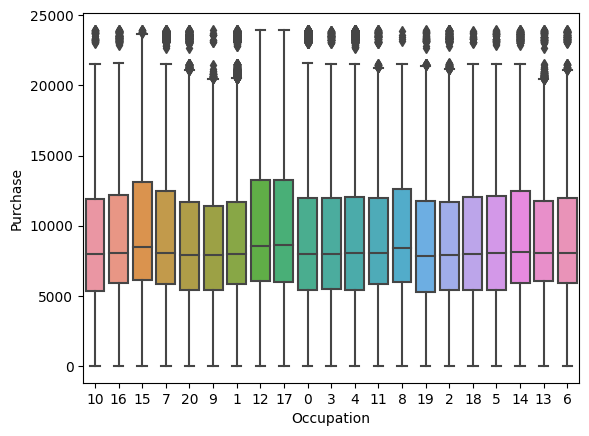

In [99]:
sns.boxplot(data=df, x='Occupation', y = 'Purchase')
plt.show()

# There doesn't seem to be too much difference in terms of purchase behaviour across Occupations

In [100]:
diff_func(cats='City_Category', aggfunc='median')

Volume_Buyers,False,True,diff_pct
City_Category,,,
A,8311,7911,4.931574
B,8636,7984,7.845969


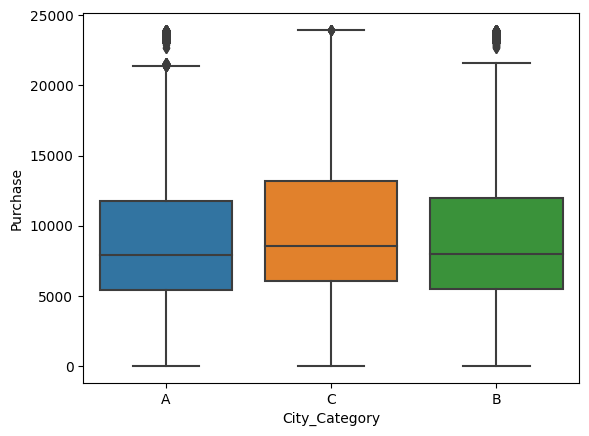

In [101]:
sns.boxplot(data=df, x='City_Category', y = 'Purchase')
plt.show()

# There doesn't seem to be too much difference in terms of purchase behaviour across City Categories

In [102]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase', 'Volume_Buyers'],
      dtype='object')

#### Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.


- Since we don't have this many data points that represent the population (rather just a sample), thereby we are required to do bootstrap sampling to generate artificial data sampled with replacement.

In [103]:
female_data = df.loc[df['Gender']=='F', 'Purchase'].to_list()
male_data = df.loc[df['Gender']=='M', 'Purchase'].to_list()

n=50000000

female_boot_data = np.random.choice(female_data, size=n)
male_boot_data = np.random.choice(male_data, size=n)

In [115]:
female_mean = np.mean(female_boot_data)
male_mean = np.mean(male_boot_data)

print(f"Mean of females purchase behaviour after bootstrapping is {female_mean}")
print(f"Mean of males purchase behaviour after bootstrapping is {male_mean}")

Mean of females purchase behaviour after bootstrapping is 8735.08370546
Mean of males purchase behaviour after bootstrapping is 9438.49778978


In [105]:
## Conducting a bootstrap survey
sampling = 200

# Here, we will be storing the means of all bootstrap samples
male_bootstrap_survey = []
female_bootstrap_survey = []

for i in range(sampling):    
    female_boot_data = np.random.choice(female_data, size=n)
    male_boot_data = np.random.choice(male_data, size=n)

    female_bootstrap_survey.append(np.mean(female_boot_data))
    male_bootstrap_survey.append(np.mean(male_boot_data))

In [114]:
female_std = np.std(female_boot_data)/(n**0.5)
male_std = np.std(male_boot_data)/(n**0.5)

print(f"The sd for female bootstrapped samples is {female_std}")
print(f"The sd for male bootstrapped samples is {male_std}")

The sd for female bootstrapped samples is 0.674272236181407
The sd for male bootstrapped samples is 0.7201822099006342


In [117]:
from scipy.stats import norm

norm.cdf(0.05), norm.cdf(0.95)


(0.5199388058383725, 0.8289438736915182)

In [110]:
np.std(female_bootstrap_survey)

0.684547646913054

In [111]:
np.std(male_bootstrap_survey)

0.7322015389550438

In [106]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Volume_Buyers
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,False
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,False
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,False
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,False
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,True


In [107]:
# average purchase by gender

df.groupby('Gender').agg({'Purchase': np.mean})

# Males purchase behaviour is skewed towards the left side i.e. they tend to purchase n higher volumes as well as sales are relatively more skewed than Female Sales

,Purchase
Gender,
F,8734.565765
M,9437.526040


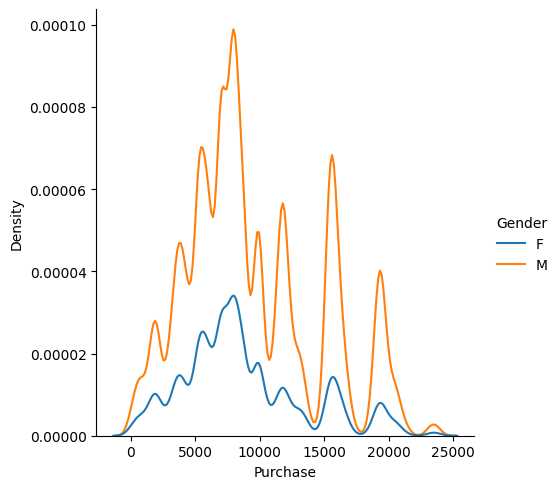

In [108]:
sns.displot(data=df, x='Purchase', hue='Gender', kind='kde')

In [109]:
customer_vars = ['Age', 'Gender', 'Occupation', 
'Marital_Status', 'City_Category', 'Stay_In_Current_City_Years', 'User_ID']

product_vars = ['Product_ID', 'Product_Category', 'Purchase']

print(f"Total Customer vars are: {len(customer_vars)}")
print(f"Total Product vars are: {len(product_vars)}")







Total Customer vars are: 7
Total Product vars are: 3
